# minimask mosaic example
Construct a mosaic of squares over the sky

In [1]:
%matplotlib notebook

import os
import numpy as np
import tempfile
import matplotlib.pyplot as pyplot
import logging

logging.basicConfig(level=logging.INFO)

import minimask.mask as mask
import minimask.healpix_projection as hp
import minimask.io.mosaic as mosaic

Specify the location of the mask file to write

In [2]:
filename = "masks/mosaic.txt"
try:
    os.mkdir(os.path.dirname(filename))
except:
    pass

Construct a mask using a tile pattern with centers specified by the healpix grid.

In [3]:
tile = np.array([[[-0.5, -0.5],[0.5, -0.5],[0.5,0.5],[-0.5,0.5]]])*8

grid = hp.HealpixProjector(nside=4)
lon, lat = grid.pix2ang(np.arange(grid.npix))
centers = np.transpose([lon, lat])

mosaic.Mosaic(tile, centers).write(filename)

INFO:minimask.io.mosaic:Wrote 1 polygons in tile and 192 pointing centers from file masks/mosaic.txt


Load the file as a mask object

In [4]:
M = mask.Mask(filename)

INFO:minimask.io.mosaic:Loaded 1 polygons in tile and 192 pointing centers from file masks/mosaic.txt (file read time: 0.0sec)


In [5]:
print "The number of polygons in the mask is {}.".format(len(M))

The number of polygons in the mask is 192.


Plot the mask on a mollweide projection using healpy.

<IPython.core.display.Javascript object>


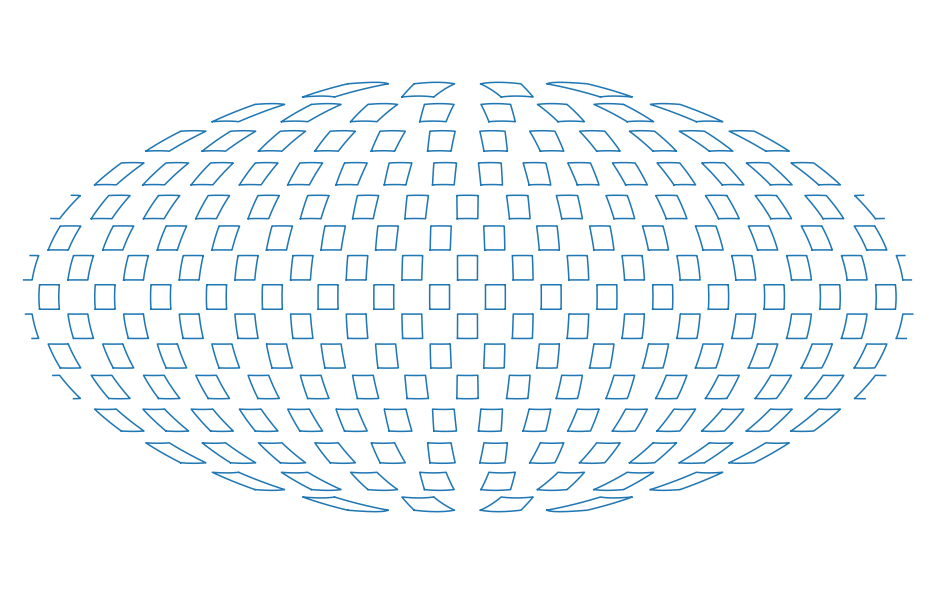

In [6]:
import healpy

healpy.mollview(title="")
for x,y in M.render(1):
    healpy.projplot(x,y,lonlat=True)

Pixelize the mask onto the healpix grid

In [7]:
map = M.pixelize(nside=64, n=10, weight=False)

<IPython.core.display.Javascript object>


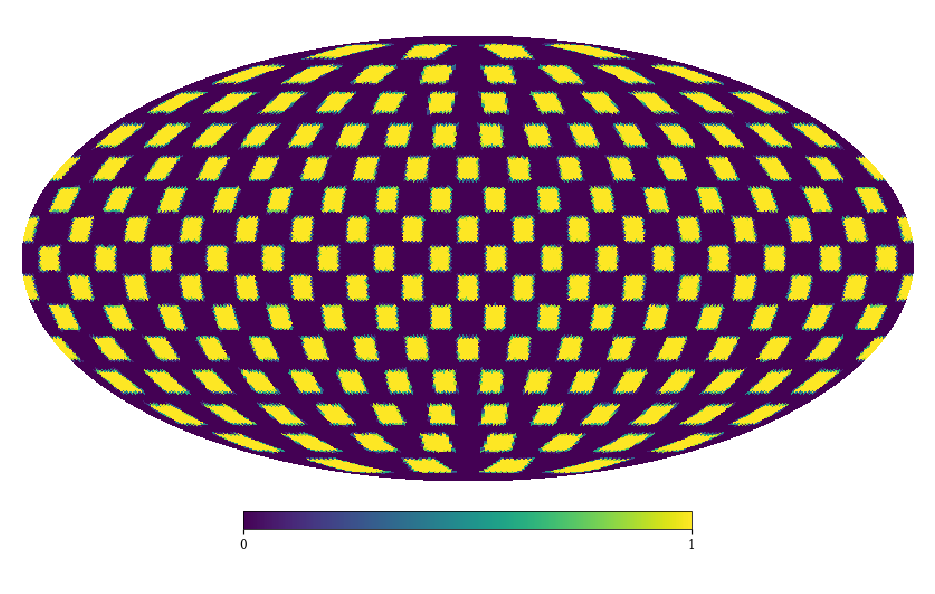

In [8]:
healpy.mollview(map, title="")